# 2.1线性点运算

In [36]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
im=Image.open("C:/Users/user/Desktop/Doraemon.jpg").convert('L')

In [37]:
im=np.array(im)
h=im.shape[0]
w=im.shape[1]
img1=np.zeros([h,w],np.uint8)
img2=np.zeros([h,w],np.uint8)
img3=np.zeros([h,w],np.uint8)

In [38]:
for i in range(h):
    for j in range(w):
       
        if(int(im[i,j]*1.5+50>255)):
            gray=255
        else:
            gray=int(im[i,j]*1.5+50)
        img1[i,j]=np.uint8(gray)

In [59]:
for i in range(h):
    for j in range(w):
        gray=int(im[i,j]*0.5)
        img2[i,j]=np.uint8(gray)

In [56]:
for i in range(h):
    for j in range(w):
       
        if(int(im[i,j]*(-1)+255>255)):
            gray=255
        else:
            gray=int(im[i,j]*(-1)+255)
        img3[i,j]=np.uint8(gray)

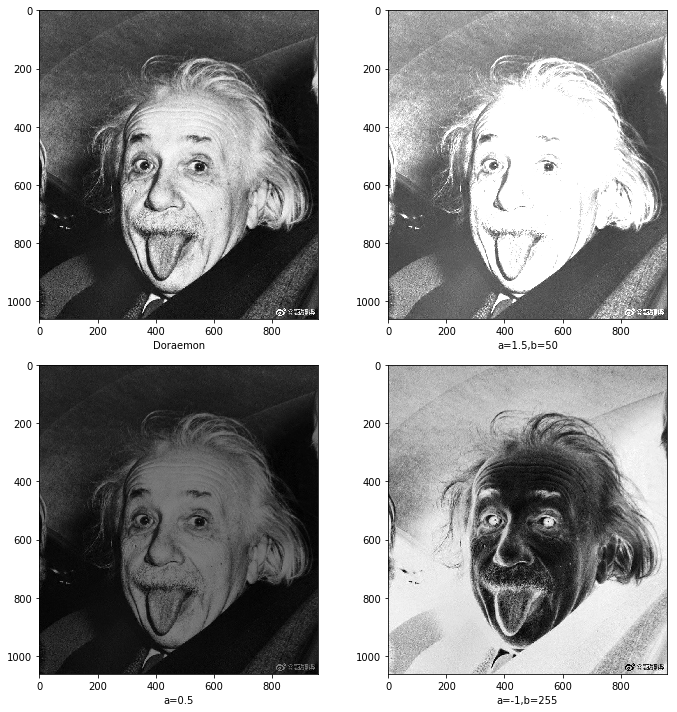

In [64]:
plt.figure(figsize=(10, 10))
plt.subplot(221), plt.imshow(im, 'gray',vmin=0,vmax=255),plt.xlabel('Doraemon')
plt.subplot(222), plt.imshow(img1, 'gray',vmin=0,vmax=255),plt.xlabel('a=1.5,b=50')
plt.subplot(223), plt.imshow(img2, 'gray',vmin=0,vmax=255),plt.xlabel('a=0.5')
plt.subplot(224), plt.imshow(img3, 'gray',vmin=0,vmax=255),plt.xlabel('a=-1,b=255')
plt.tight_layout()
plt.show()

# 2.2 分段线性点运算

In [7]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
ig=Image.open("C:/Users/user/Desktop/A..jpg").convert('L')

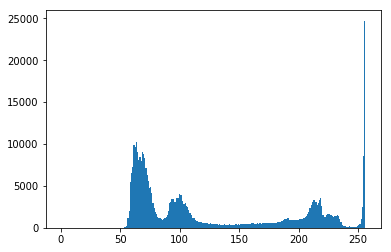

In [9]:
ig=np.array(ig)
plt.hist(ig.ravel(),256,[0,256])
plt.show()

In [31]:
def linear_transform(ig):
    h,w=ig.shape[:2]
    r1,s1=60,10
    r2,s2=130,150
    k1=s1/r1
    k2=(s2-s1)/(r2-r1)
    k3=(255-s2)/(255-r2)
    ige=np.zeros([h,w])
    for i in range(h):
            for j in range(w):
                if ig[i,j]<r1:
                    ige[i,j]=k1*ig[i,j]
                elif r1<=ig[i,j]<=r2:
                    ige[i,j]=k2*(ig[i,j]-r1)+s1
                else:
                    ige[i,j]=k3*(ig[i,j]-r2)+s2
    return ige
                    

In [32]:
ig1=linear_transform(ig)

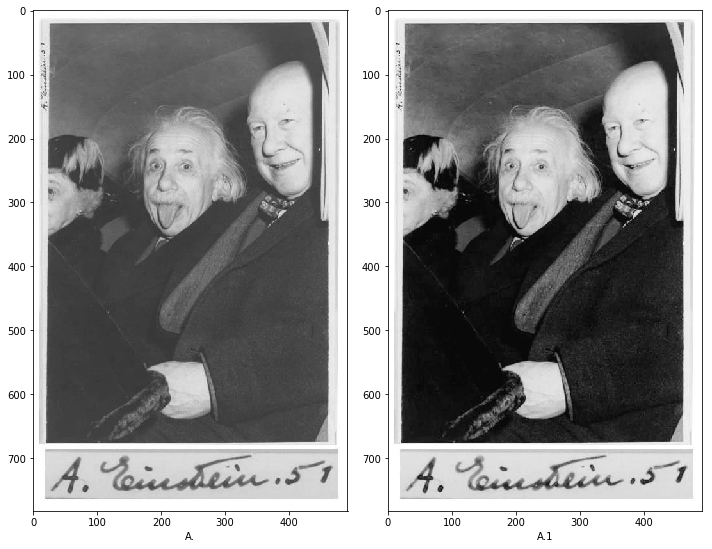

In [33]:
plt.figure(figsize=(10, 10))
plt.subplot(121), plt.imshow(ig, 'gray',vmin=0,vmax=255),plt.xlabel('A.')
plt.subplot(122), plt.imshow(ig1, 'gray',vmin=0,vmax=255),plt.xlabel('A.1')
plt.tight_layout()
plt.show()

# 2.3非线性点运算

## 2.3.1对数变换

In [56]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
im=Image.open("C:/Users/user/Desktop/Doraemon.jpg").convert('L')

In [57]:
def log(c,im):
    im=np.array(im)
    output=c*np.log(1+im)
    output=np.uint8(output+0.5)
    return output

In [58]:
img4=log(42,im)

D:\Python\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


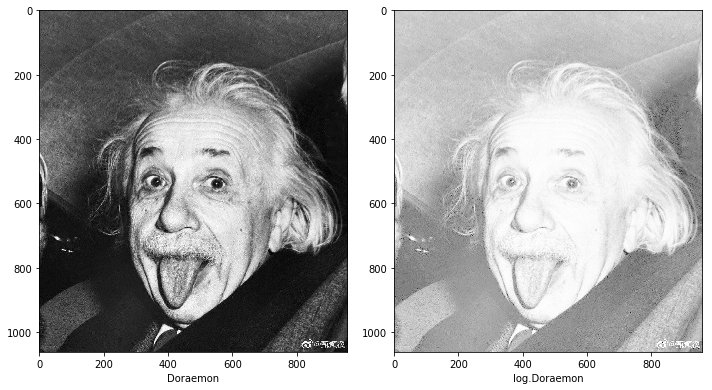

In [59]:
plt.figure(figsize=(10, 10))
plt.subplot(121), plt.imshow(im, 'gray'),plt.xlabel('Doraemon')
plt.subplot(122), plt.imshow(img4, 'gray'),plt.xlabel('log.Doraemon')
plt.tight_layout()
plt.show()

## 2.3.1伽马变换

In [67]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
im=Image.open("C:/Users/user/Desktop/Doraemon.jpg").convert('L')

In [88]:
def gamma(im,c,v):
    im=np.array(im)
    lut=c*im**v
    #lut=np.uint8(lut+0.5)
    return lut

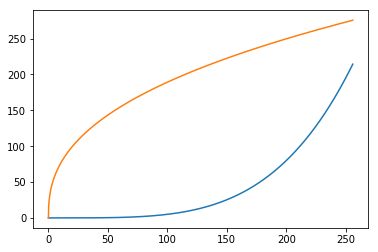

In [91]:
img5=gamma(im,0.00000005,4.0)
img6=gamma(im,30,0.4)
img7=gamma(im,1,1)

x=np.arange(0,256,0.1)
y1=gamma(x,0.00000005,4.0)
y2=gamma(x,30,0.4)
plt.plot(x,y1)
plt.plot(x,y2)

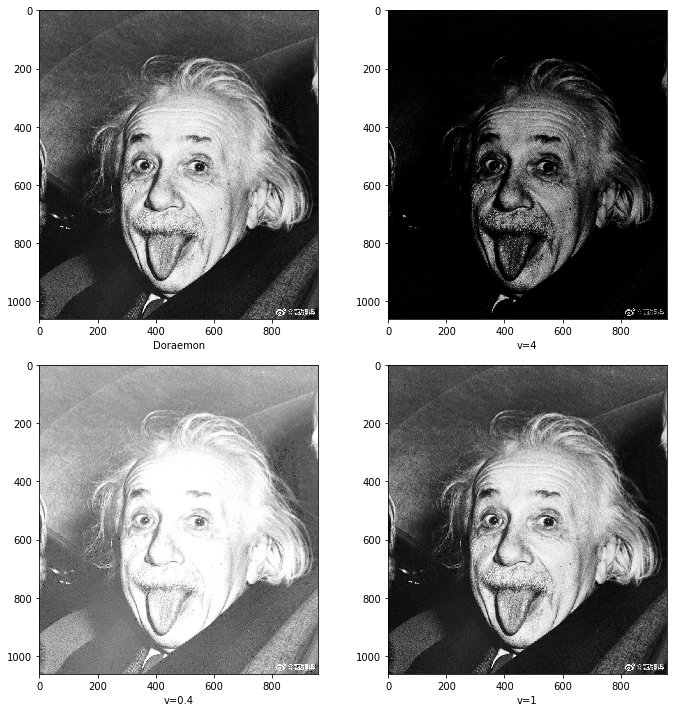

In [93]:
plt.figure(figsize=(10, 10))
plt.subplot(221), plt.imshow(im, 'gray',vmin=0,vmax=255),plt.xlabel('Doraemon')
plt.subplot(222), plt.imshow(img5, 'gray',vmin=0,vmax=255),plt.xlabel('v=4')
plt.subplot(223), plt.imshow(img6, 'gray',vmin=0,vmax=255),plt.xlabel('v=0.4')
plt.subplot(224), plt.imshow(img7, 'gray',vmin=0,vmax=255),plt.xlabel('v=1')
plt.tight_layout()
plt.show()